In [1]:
from zachopy.borrowed.mpfit import mpfit


In [ ]:
mpfitted = mpfit.mpfit(self.model.deviates, p0, parinfo=parinfo, quiet=quiet)


In [2]:
import lmfit

AttributeError: 'Parameter' object has no attribute 'err'

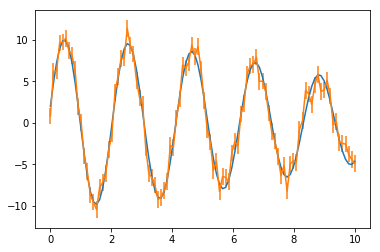

In [48]:
import numpy as np, matplotlib.pyplot as plt
%matplotlib inline

def model(params, x):
    '''a model of lmfit parameters'''
    amp = params['amp']
    phaseshift = params['phase']
    freq = params['frequency']
    decay = params['decay']

    return amp * np.sin(x*freq + phaseshift) * np.exp(-x*x*decay)
    
def residual(params, x, data, eps_data):
    '''the residuals, given a lmfit parameter list'''
    return (data-model(params, x)) / eps_data

from lmfit import minimize, Parameters

params = Parameters()
params.add('amp', value=10)
params.add('decay', value=0.007)
params.add('phase', value=0.2)
params.add('frequency', value=3.0)

x = np.linspace(0,10,100)

y_perfect = model(params, x)
sigma = np.ones_like(x)*1
y = np.random.normal(y_perfect, sigma)
plt.plot(x, y_perfect)
plt.errorbar(x, y, sigma)

out = minimize(residual, params, args=(x, y, sigma))



In [52]:
p = out.params['amp']
p.init_value, p.value, p.stderr

(10, 10.241353869295619, 0.23688815680241218)

In [7]:
# the covariance matrix
out.covar

array([[ 5.10797471e-02,  9.74398670e-05, -4.41768800e-04,
         8.45240902e-05],
       [ 9.74398670e-05,  4.12470746e-07, -1.03007511e-06,
         2.29179763e-07],
       [-4.41768800e-04, -1.03007511e-06,  8.97578487e-04,
        -1.56857227e-04],
       [ 8.45240902e-05,  2.29179763e-07, -1.56857227e-04,
         3.97066058e-05]])

In [38]:
out.params['amp'].value

10.116578085617778

In [31]:
params = Parameters()
params.add('decay', value=0.007)
params.add('amp', value=10)
params.add('phase', value=0.2)
params.add('frequency', value=3.0)
p = params['amp']

In [33]:
out = minimize(residual, params, args=(x, y, sigma))

In [34]:
out.var_names

['decay', 'amp', 'phase', 'frequency']

In [21]:
out.ndata

100

In [22]:
out.nfree

96

In [27]:
out.var_names

['amp', 'decay', 'phase', 'frequency']